In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Load the data

In [ ]:
#import csv file
with open('C:\\Users\\rohan\\Documents\\Analytics\\Brighter Brain\\linear_regression_test.csv', 'r') as f:
    results = []
    for line in f:
            lines = line.rstrip()
            words = lines.split(',')
            results.append((words[0], words[1:]))

#Set X and y values and convert them to numpy arrays
X = [x[0] for x in results]
X = np.array(X)
X = np.float64(X)
y = [x[1] for x in results]
y = np.array(y)
y = np.squeeze(y)
y = np.float64(y)

# 2. Visualize the data

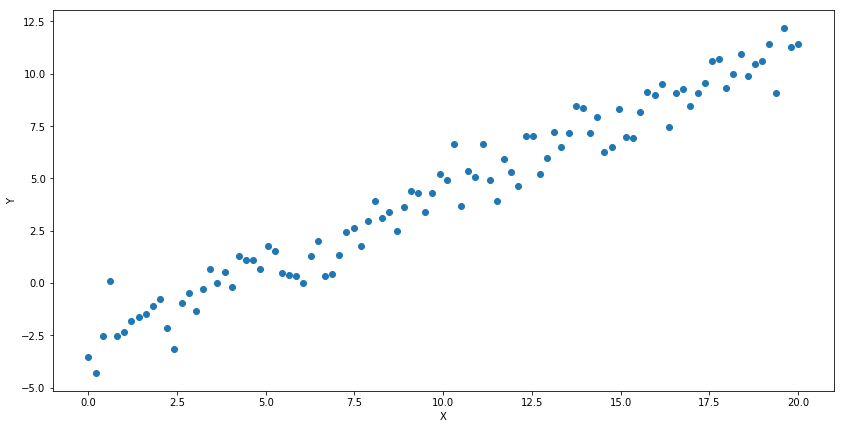

In [227]:
#Make scatter plot
plt.scatter(X,y)
fig = plt.gcf()
fig.set_size_inches(14,7)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 3. Normal Equation method

In [229]:
def normalEquation(X, y,N):

    # Vector with minimized values
    theta = []

    # Bias vector
    bias_vector = np.ones((N, 1))

    # Reshape X vector 
    X = np.reshape(X, (N, 1))

    # combine bias and X vector
    X = np.append(bias_vector, X, axis=1)

    # Normal Equation -> theta = inv(X^T * X) * X^T * y

    # Calculating theta
    theta = np.linalg.inv(np.transpose(X).dot(X))
    theta = theta.dot(np.transpose(X))
    theta = theta.dot(y)

    return theta

bias_normal, weight_normal = normalEquation(X, y,len(X))

# 4. Visualize the fit using Normal-Equation method and report R^2

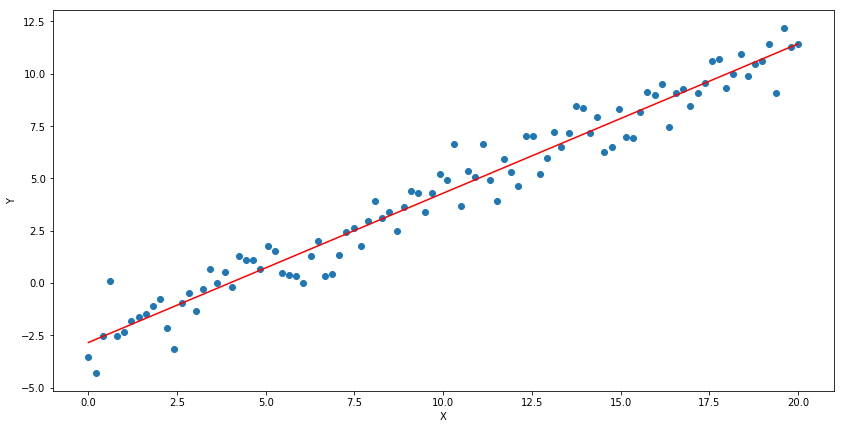

In [234]:
#Make scatter plot
plt.scatter(X,y)


x_line = np.linspace(min(X), max(X), 100)
y_line = bias_normal + weight_normal*X
#plotting line 
plt.plot(x_line, y_line, color='red', label='Linear Regression')

plt.xlabel('X')
plt.ylabel('Y')

fig = plt.gcf()
fig.set_size_inches(14,7)
plt.show()

In [254]:
#R^2
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [np.average(ys_orig) for y in ys_orig]
    squared_error_regr = sum((ys_line - ys_orig) * (ys_line - ys_orig))
    squared_error_y_mean = sum((y_mean_line - ys_orig) * (y_mean_line - ys_orig))
    return 1 - (squared_error_regr/squared_error_y_mean)

print('R2 for Normal Equation method is : ' + str( coefficient_of_determination(y,weight_normal*X+bias_normal)))

R2 for Normal Equation method is : 0.9588234432670139


# 5. Gradient Descent method

In [232]:
#cost function
def cost_function(X, y, weight, bias):
    N = len(X)
    error = 0.0
    for i in range(N):
        error += (y[i] - (weight*X[i] + bias))**2
    return error / N

#update weights and bias
def update_weights(X, y, weight, bias, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    N = len(X)

    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -2*X[i] * (y[i] - (weight*X[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -2*(y[i] - (weight*X[i] + bias))

    # Update weights and bias
    weight -= (weight_deriv ) * learning_rate
    bias -= (bias_deriv ) * learning_rate

    return weight, bias

#train model
def train(X, y, weight, bias, learning_rate, iters):
    cost_history = []

    for i in range(iters):
        weight,bias = update_weights(X, y, weight, bias, learning_rate)

        cost = cost_function(X, y, weight,bias)
        cost_history.append(cost)

    return weight, bias, cost_history

weight_grad, bias_grad, cost_history = train(X,y,1,1,.00001,10000)

# 6. Visualize the fit using Gradient descent method and report R^2

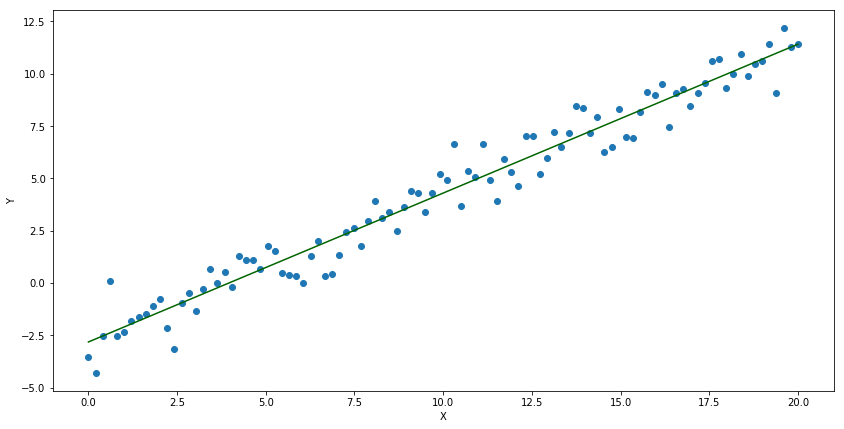

In [235]:
#Make scatter plot
plt.scatter(X,y)


x_line = np.linspace(min(X), max(X), 100)
y_line = bias_grad + weight_grad*X
#plotting line 
plt.plot(x_line, y_line, color='darkgreen', label='Linear Regression')

plt.xlabel('X')
plt.ylabel('Y')

fig = plt.gcf()
fig.set_size_inches(14,7)
plt.show()

In [253]:
#R^2
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [np.average(ys_orig) for y in ys_orig]
    squared_error_regr = sum((ys_line - ys_orig) * (ys_line - ys_orig))
    squared_error_y_mean = sum((y_mean_line - ys_orig) * (y_mean_line - ys_orig))
    return 1 - (squared_error_regr/squared_error_y_mean)

print('R2 for Gradient Descent method is : ' + str( coefficient_of_determination(y,weight_grad*X+bias_grad)))

R2 for Gradient Descent method is : 0.9588150955744944
